<a href="https://colab.research.google.com/github/Bahrombekk/OpenCV/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2204_Contour_Features_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# https://github.com/Naxalov/ComputerVision/tree/master/shape%20detection

In [21]:
!wget -O image.png https://raw.githubusercontent.com/Naxalov/ComputerVision/master/shape%20detection/05_square.png

--2023-05-19 10:28:29--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/shape%20detection/05_square.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2344 (2.3K) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>]   2.29K  --.-KB/s    in 0s      

2023-05-19 10:28:29 (30.0 MB/s) - ‘image.png’ saved [2344/2344]



In [22]:
# utility 
def show(img,s=8,b=False):
  plt.figure(figsize=(s,s))
  plt.imshow(img,cmap='gray')
  plt.grid(alpha=.2)
  plt.grid(b)
  plt.show()

In [35]:
# load shape image
img = cv2.imread('image.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

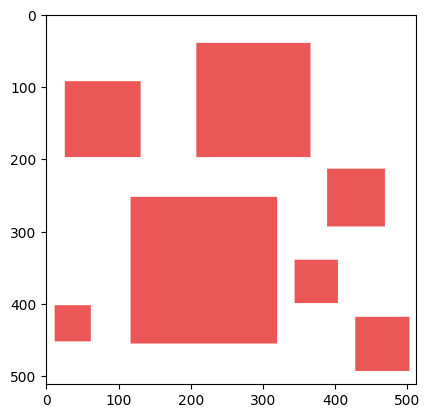

In [36]:
plt.imshow(img)
plt.show()

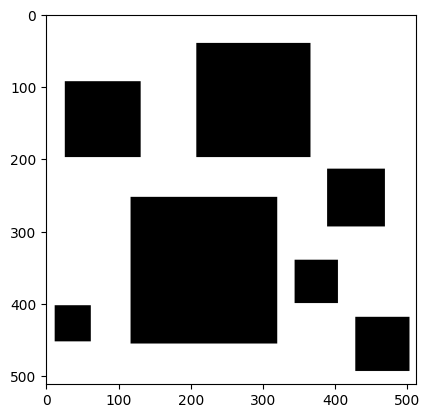

In [37]:
plt.imshow(gray,cmap='gray')
plt.show()

In [38]:
thresh = cv2.inRange(gray, 0, 200)
contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,	cv2.CHAIN_APPROX_SIMPLE)

# Contour Area


In [39]:
area = cv2.contourArea(contours[0])
print(area)

5476.0


In [40]:
data = []
i=0
for cnt in contours:
  
  data.append(cv2.contourArea(cnt))
  print(cv2.contourArea(cnt))

5476.0
2401.0
3481.0
40804.0
6241.0
10816.0
24649.0


In [41]:
data = sorted(data)

In [42]:
data

[2401.0, 3481.0, 5476.0, 6241.0, 10816.0, 24649.0, 40804.0]

In [43]:
img_area = cv2.drawContours(img.copy(),contours,1,(255,255,0),2)

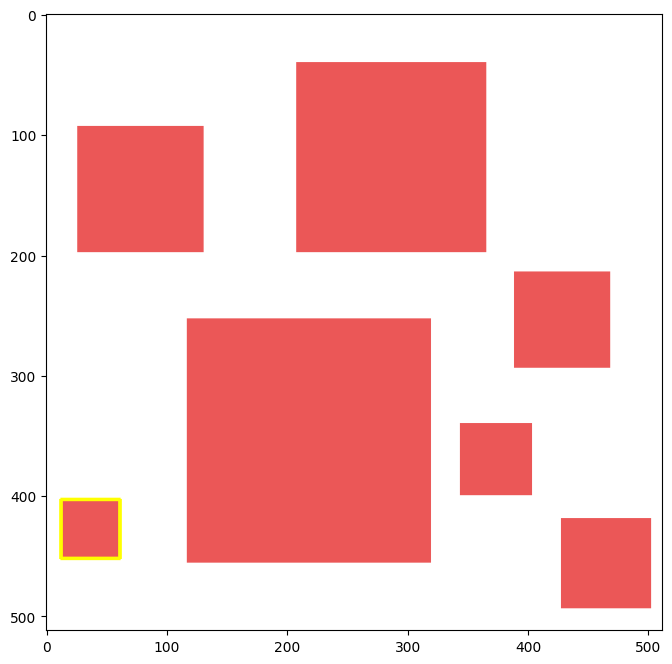

In [44]:
show(img_area)

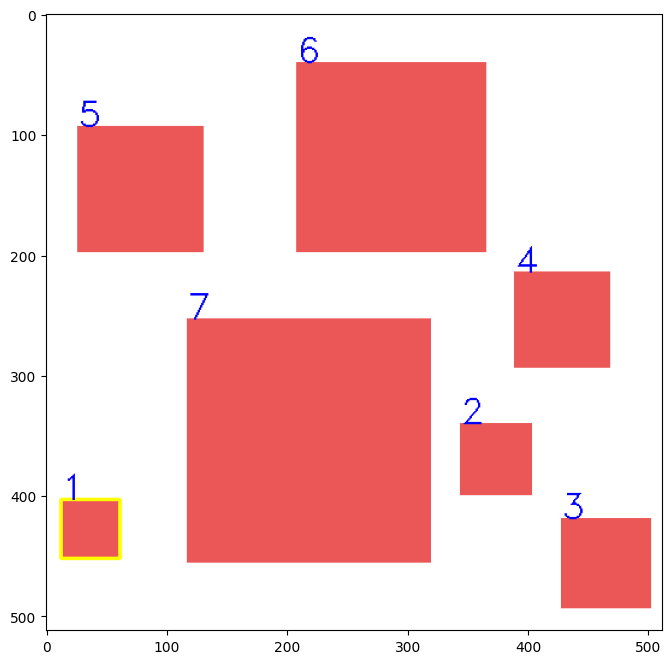

In [45]:
for i in data:
  for j in contours:
    s = cv2.contourArea(j)
    x,y,h,w = cv2.boundingRect(j)
    k = data.index(s)
    if i==s:
      img = cv2.putText(img_area,str(k+1),(x,y),2,1,(0,0,255))    
show(img)
    